<a href="https://colab.research.google.com/github/sushantkumar-estech/Linear-regression-using-ANN-with-Pytorch/blob/master/Linear_regrssion_pytorch_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import torch.nn as nn   # importing neural network function

In [14]:
X = torch.linspace(1,50,50).reshape(-1,1)  # reshape(-1,1) allows to have entire value in columns

In [15]:
X.shape

torch.Size([50, 1])

In [16]:
torch.manual_seed(71)
e = torch.randint(-8,9, (50,1), dtype = torch.float)

In [17]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [18]:
y = 2*X + 1 + e

In [19]:
y.shape

torch.Size([50, 1])

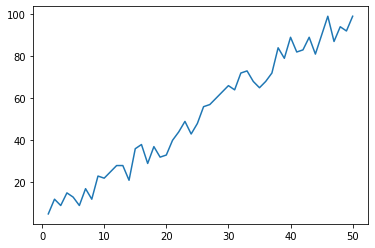

In [20]:
plt.plot(X.numpy(),y.numpy())  # conversion of tensor to numpy for plotting

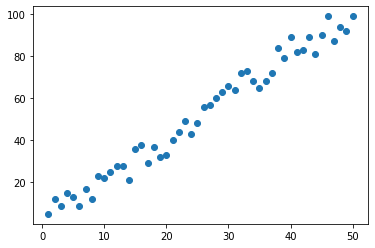

In [21]:
plt.scatter(X.numpy(),y.numpy())

In [22]:
torch.manual_seed(59)
## defining the simple Linear model with single linear layer
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [23]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [24]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [25]:
for name,param in model.named_parameters():
    print(name,'\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [26]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [27]:
x1 = np.linspace(0.0,50,50)

In [28]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [29]:
w1 = 0.10597813129425049
b1 = 0.9637961387634277

y1 =w1*x1 + b1

In [30]:
y1

array([0.96379614, 1.07193709, 1.18007804, 1.28821899, 1.39635994,
       1.50450089, 1.61264184, 1.72078279, 1.82892374, 1.93706469,
       2.04520564, 2.15334659, 2.26148754, 2.36962849, 2.47776944,
       2.58591039, 2.69405134, 2.80219229, 2.91033324, 3.01847419,
       3.12661514, 3.2347561 , 3.34289705, 3.451038  , 3.55917895,
       3.6673199 , 3.77546085, 3.8836018 , 3.99174275, 4.0998837 ,
       4.20802465, 4.3161656 , 4.42430655, 4.5324475 , 4.64058845,
       4.7487294 , 4.85687035, 4.9650113 , 5.07315225, 5.1812932 ,
       5.28943415, 5.3975751 , 5.50571605, 5.613857  , 5.72199795,
       5.8301389 , 5.93827985, 6.0464208 , 6.15456175, 6.2627027 ])

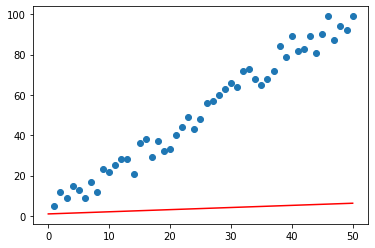

In [31]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')

In [32]:
criterion = nn.MSELoss()  # evaluating the network performance on MSE bases

In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  #defining stochastic gradient descent optimizer

In [34]:
# Now training the model with chossinf number of epochs
epochs = 50
losses = []

for i in range(epochs):
    
    i = i+1
    
    # PREDICTING ON THE FORWARD PASS
    y_pred=model.forward(X)
    
    # CACULATE OUR LOSS (ERROR)
    loss = criterion(y_pred,y)
    
    # RECORD THAT ERROR
    losses.append(loss)
    
    print(f"epoch{i} loss:{loss.item()} weight:{model.linear.weight.item()} bias:{model.linear.bias.item()}")
    
    optimizer.zero_grad()  # stopping gradient from compounding during backpropapgation
    
    loss.backward()  # proform backpropagation
    optimizer.step() #update the hyperpaprameter, here is is single weight and single bias
    

epoch1 loss:3057.216796875 weight:0.10597813129425049 bias:0.9637961387634277
epoch2 loss:1588.53076171875 weight:3.334900140762329 bias:1.0604636669158936
epoch3 loss:830.2999267578125 weight:1.014832854270935 bias:0.9922628402709961
epoch4 loss:438.8521423339844 weight:2.6817994117736816 bias:1.0425218343734741
epoch5 loss:236.76144409179688 weight:1.4840213060379028 bias:1.0076650381088257
epoch6 loss:132.4291229248047 weight:2.3446059226989746 bias:1.0339646339416504
epoch7 loss:78.56573486328125 weight:1.7262253761291504 bias:1.0163217782974243
epoch8 loss:50.75775909423828 weight:2.170504093170166 bias:1.0302516222000122
epoch9 loss:36.4012336730957 weight:1.8512457609176636 bias:1.0214954614639282
epoch10 loss:28.98923110961914 weight:2.0806007385253906 bias:1.029038906097412
epoch11 loss:25.16238784790039 weight:1.9157683849334717 bias:1.0248701572418213
epoch12 loss:23.186473846435547 weight:2.034165620803833 bias:1.0291162729263306
epoch13 loss:22.166122436523438 weight:1.949

Text(0.5, 0, '50')

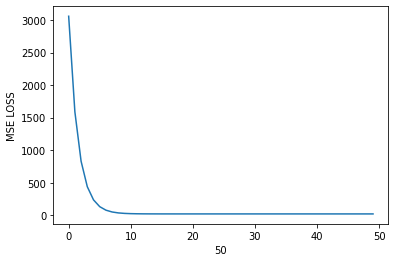

In [35]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE LOSS')
plt.xlabel(epochs)

In [36]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

In [37]:
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

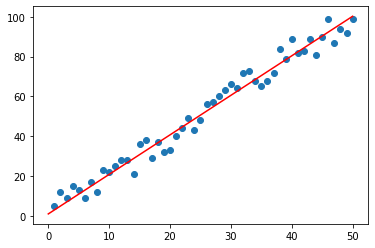

In [38]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')